# Mallet

Another algorithm for topic modeling is implemented in the java-based software Mallet. For this to work **you need to download and install Mallet** from http://mallet.cs.umass.edu/download.php.
Mallet uses plain text as input, so none of the preprocessing steps of this package are available for Mallet topic modeling as of yet.

#### Loading modules from DARIAH-Topics library
First, we have to get access to the functionalities of the library by importing them. For using its functions we use the prefix of the toolbox's submodules (pre, visual and mallet).

In [1]:
from dariah_topics import preprocessing as pre
from dariah_topics import visualization as visual
from dariah_topics import mallet as mal

#### Activating inline output in Jupyter notebook
The following line will just tell the notebook to show graphics in the output frames.

In [2]:
%matplotlib inline

### Preprocessing

#### Liste mit Dateinamen erzeugen

In [3]:
path_to_corpus = "corpus_txt"
path_doc_list = pre.PathDocList(path_to_corpus)

doclist_txt = path_doc_list.full_paths(as_str=True)
doclist_txt[:5]

['corpus_txt/Lovecraft_AttheMountainofMadness.txt',
 'corpus_txt/Howard_TheDevilinIron.txt',
 'corpus_txt/Poe_ThePurloinedLetter.txt',
 'corpus_txt/Lovecraft_TheShunnedHouse.txt',
 'corpus_txt/Poe_TheMasqueoftheRedDeath.txt']

#####  Liste mit Dokumentenlabels erzeugen

In [4]:
doc_labels = path_doc_list.labels()
doc_labels[:5]

['Lovecraft_AttheMountainofMadness',
 'Howard_TheDevilinIron',
 'Poe_ThePurloinedLetter',
 'Lovecraft_TheShunnedHouse',
 'Poe_TheMasqueoftheRedDeath']

#### Corpus laden

In [5]:
corpus_txt = pre.read_from_txt(doclist_txt)

##### Tokenisieren

In [6]:
doc_tokens = [list(pre.tokenize(txt)) for txt in list(corpus_txt)]
len(doc_tokens)

INFO preprocessing: Accessing TXT documents ...


17

#### Create Dictionaries

In [7]:
id_types = pre.create_dictionary(doc_tokens)
doc_ids = pre.create_dictionary(doc_labels)

#### Create Sparse Bow (for large corpora)

In [8]:
sparse_bow = pre.create_sparse_bow(doc_labels, doc_tokens, id_types, doc_ids)

In [9]:
##### Remove features

In [10]:
import os.path
basepath = os.path.abspath('.')

with open(os.path.join(basepath, "tutorial_supplementals", "stopwords", "en.txt"), 'r', encoding = 'utf-8') as f: 
    stopword_list = f.read().split('\n')
    
stopword_list = set(stopword_list)

In [11]:
hapax_from_remove = pre.find_hapax(sparse_bow, id_types)
stopwords_from_remove = pre.find_stopwords(sparse_bow, id_types, mfw=75)

features_to_be_removed = stopwords_from_remove + hapax_from_remove

sparse_bow_short = pre.remove_features(sparse_bow, id_types, features_to_be_removed)
len(stopwords_from_remove)

INFO preprocessing: Finding hapax legomena ...
INFO preprocessing: Finding stopwords ...
INFO preprocessing: Removing features ...


75

In [12]:
doc2bow_list = []
for doc in sparse_bow.index.groupby(sparse_bow.index.get_level_values('doc_id')):
    temp = [(token, count) for token, count in zip(sparse_bow.loc[doc].index, sparse_bow.loc[doc][0])]
    doc2bow_list.append(temp)
len(doc2bow_list)

17

In [13]:
#len(features_to_be_removed)
#len(doc_tokens[0])

#### Remove features from files

In [14]:
doc_tokens_cleaned = []

for doc_token_list in doc_tokens:
    doc_token_list_cleaned = pre.remove_features_from_file(doc_token_list, features_to_be_removed)
    doc_tokens_cleaned.append(list(doc_token_list_cleaned))

In [15]:
doc_tokens_cleaned[0]

[['mountains',
  'madness',
  'lovecraft',
  'chapter',
  'am',
  'forced',
  'speech',
  'because',
  'men',
  'science',
  'refused',
  'follow',
  'advice',
  'without',
  'knowing',
  'why',
  'altogether',
  'against',
  'tell',
  'reasons',
  'contemplated',
  'invasion',
  'antarctic',
  'its',
  'vast',
  'fossil',
  'hunt',
  'its',
  'wholesale',
  'boring',
  'melting',
  'ancient',
  'ice',
  'caps',
  'am',
  'reluctant',
  'because',
  'warning',
  'may',
  'vain',
  'doubt',
  'real',
  'facts',
  'must',
  'reveal',
  'inevitable',
  'yet',
  'suppressed',
  'seem',
  'extravagant',
  'incredible',
  'nothing',
  'left',
  'hitherto',
  'withheld',
  'photographs',
  'both',
  'ordinary',
  'aerial',
  'count',
  'favor',
  'damnably',
  'vivid',
  'graphic',
  'still',
  'doubted',
  'because',
  'great',
  'lengths',
  'clever',
  'can',
  'carried',
  'ink',
  'drawings',
  'course',
  'jeered',
  'obvious',
  'notwithstanding',
  'strangeness',
  'technique',
  'art

#### Write mallet import files

In [16]:
pre.create_mallet_import(doc_tokens_cleaned, doc_labels)

## 1. Setting the parameters

#### Define path to corpus folder

In [17]:
path_to_corpus = "tutorial_supplementals/mallet_input/"

#### Path to mallet folder 

Now we must tell the library where to find the local instance of mallet. If you managed to install Mallet, it is sufficient set `path_to_mallet = "mallet"`, if you just store Mallet in a local folder, you have to specify the path to the binary explictly.

In [18]:
#path_to_mallet = "/home/sina/mallet-2.0.8/bin/mallet"
#path_to_mallet = "/home/severin/Documents/dariah/app/mallet/bin/mallet"
path_to_mallet = 'mallet'

#### Output folder

In [19]:
outfolder = "tutorial_supplementals/mallet_output"
binary = "tutorial_supplementals/mallet_output/binary.mallet"

#### The Mallet corpus model

Finally, we can give all these folder paths to a Mallet function that handles all the preprocessing steps and creates a Mallet-specific corpus model object.

In [20]:
mallet_model = mal.create_mallet_binary(path_to_mallet=path_to_mallet, path_to_corpus=path_to_corpus, output_file=binary)

INFO mallet: Running MALLET with ['/home/sina/mallet-2.0.8/bin/mallet', 'import-dir', '--input', 'tutorial_supplementals/mallet_input/', '--remove-stopwords', '--keep-sequence', '--output', 'tutorial_supplementals/mallet_output/binary.mallet'] ...
INFO mallet: Saving MALLET binary to tutorial_supplementals/mallet_output/binary.mallet ...


## 2. Model creation

**Warning: this step can take quite a while!** Meaning something between some seconds and some hours depending on corpus size and the number of passes.

In [21]:
num_topics = 10
output_folder = mal.create_mallet_model(path_to_mallet = path_to_mallet, 
                                        path_to_binary = mallet_model, 
                                        folder_for_output = outfolder,
                                        num_top_words = 10,
                                        num_iterations = 500,
                                        num_topics = num_topics,
                                        output_topic_docs=True
                                        )

INFO mallet: Accessing Mallet with ['/home/sina/mallet-2.0.8/bin/mallet', 'train-topics', '--input', 'tutorial_supplementals/mallet_output/binary.mallet', '--num-topics', '10', '--num-iterations', '500', '--num-threads', '1', '--num-top-words', '10', '--num-icm-iterations', '0', '--random-seed', '0', '--optimize-interval', '0', '--optimize-burn-in', '200', '--use-symmetric-alpha', '--alpha', '5.0', '--beta', '0.01', '--output-topic-keys', 'tutorial_supplementals/mallet_output/topic_keys.txt', '--output-doc-topics', 'tutorial_supplementals/mallet_output/doc_topics.txt', '--doc-topics-threshold', '0.0', '--topic-word-weights-file', 'tutorial_supplementals/mallet_output/topic_word_weights.txt', '--word-topic-counts-file', 'tutorial_supplementals/mallet_output/word_topic_counts.txt', '--diagnostics-file', 'tutorial_supplementals/mallet_output/diagnostics.xml', '--xml-topic-report', 'tutorial_supplementals/mallet_output/topic_report.xml', '--xml-topic-phrase-report', 'tutorial_supplementals

### 2.4. Create document-topic matrix

The generated model object can now be translated into a human-readable document-topic matrix (that is a actually a pandas data frame) that constitutes our principle exchange format for topic modeling results. For generating the matrix from a Gensim model, we can use the following function:

In [22]:
doc_topic = mal.show_doc_topic_matrix("tutorial_supplementals/mallet_output")
doc_topic

,Lovecraft_AttheMountainofMadness.txt,Howard_TheDevilinIron.txt,Poe_ThePurloinedLetter.txt,Lovecraft_TheShunnedHouse.txt,Poe_TheMasqueoftheRedDeath.txt,Doyle_TheSignoftheFour.txt,Doyle_AStudyinScarlet.txt,Howard_ShadowsintheMoonlight.txt,Kipling_TheEndofthePassage.txt,Poe_EurekaAProsePoem.txt,Howard_GodsoftheNorth.txt,Doyle_TheHoundoftheBaskervilles.txt,Kipling_ThyServantaDog.txt,Poe_TheCaskofAmontillado.txt,Doyle_AScandalinBohemia.txt,examplefile.txt,Howard_SchadowsinZamboula.txt,Kipling_TheJungleBook.txt
holmes time small,0.006497,0.007935,0.052597,0.054114,0.026224,0.352854,0.338984,0.010306,0.061070,0.004721,0.001068,0.082294,0.021906,0.053459,0.312613,0.071429,0.013421,0.009549
sir holmes moor,0.010472,0.011752,0.034991,0.061360,0.035548,0.132370,0.101602,0.010110,0.313469,0.006951,0.015302,0.436942,0.038512,0.029560,0.162559,0.071429,0.006368,0.015231
lake camp land,0.485018,0.025010,0.020026,0.070243,0.000583,0.008181,0.016951,0.016981,0.013100,0.010148,0.057295,0.007178,0.002205,0.045912,0.005618,0.071429,0.006759,0.004341
conan mowgli jungle,0.002462,0.315689,0.000660,0.001519,0.046037,0.008902,0.002166,0.367197,0.016052,0.000409,0.409609,0.001018,0.007552,0.000629,0.002356,0.071429,0.268711,0.257668
ravager smallest dog,0.001632,0.004721,0.000220,0.009701,0.005245,0.007172,0.006292,0.001669,0.007934,0.000260,0.003203,0.003785,0.552819,0.000629,0.001269,0.071429,0.002253,0.002552
great thing left,0.213629,0.190538,0.048195,0.474871,0.181235,0.055896,0.055323,0.158912,0.045203,0.043826,0.104982,0.061779,0.028661,0.093711,0.035339,0.214286,0.113930,0.018967
eyes black door,0.032188,0.316894,0.064481,0.075619,0.443473,0.106566,0.116456,0.312623,0.134502,0.011189,0.359786,0.115441,0.058964,0.150314,0.131026,0.214286,0.460325,0.064581
long made thought,0.160822,0.067999,0.540273,0.134058,0.185897,0.220953,0.244705,0.054672,0.117897,0.120772,0.016014,0.228715,0.096773,0.521384,0.262595,0.071429,0.053585,0.043221
head big time,0.027145,0.043290,0.023988,0.058555,0.005245,0.085664,0.090393,0.060169,0.263653,0.000855,0.032384,0.043091,0.183460,0.045912,0.066510,0.071429,0.063382,0.582496
centre point sun,0.060134,0.016171,0.214569,0.059958,0.070513,0.021443,0.027128,0.007362,0.027122,0.800870,0.000356,0.019758,0.009147,0.058491,0.020116,0.071429,0.011266,0.001394


## 3. Visualization

Now we can see the topics in the model with the following function:

**Hint:** Depending on the number of topics chosen in step 2, you might have to adjust *num_topics* in this step accordingly.

In [23]:
num_topics = 10
mal.show_topics_keys("tutorial_supplementals/mallet_output", num_topics = num_topics)

,Key 1,Key 2,Key 3,Key 4,Key 5,Key 6,Key 7,Key 8,Key 9,Key 10
Topic 1,holmes,time,small,cried,answered,room,hand,asked,sherlock,found
Topic 2,sir,holmes,moor,watson,henry,light,baskerville,night,face,back
Topic 3,lake,camp,land,feet,city,mountains,world,danforth,things,found
Topic 4,conan,mowgli,jungle,back,men,thou,nag,baloo,khan,feet
Topic 5,ravager,smallest,dog,moore,slippers,proper,master,tags,wented,back
Topic 6,great,thing,left,house,place,stone,walls,human,horror,strange
Topic 7,eyes,black,door,hand,hands,head,wall,fear,face,voice
Topic 8,long,made,thought,make,find,moment,end,gave,knew,doubt
Topic 9,head,big,time,good,bagheera,back,till,heard,white,wolf
Topic 10,centre,point,sun,atoms,fact,matter,idea,force,general,universe


### 3.1. Distribution of topics

#### Distribution of topics over all documents

The distribution of topics over all documents can now be visualized in a heat map:

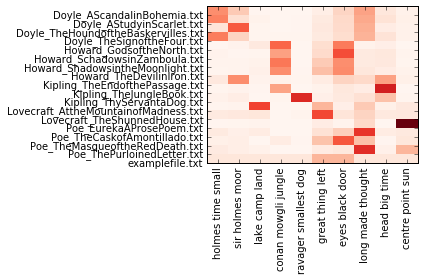

In [24]:
heatmap = visual.doc_topic_heatmap(doc_topic)
heatmap.show()

#### Distribution of topics in a single documents

To take closer look on the topics in a single text, we can use the follwing function that shows all the topics in a text and their respective proportions. To select the document, we have to give its index to the function.

<module 'matplotlib.pyplot' from '/home/sina/.local/lib/python3.5/site-packages/matplotlib/pyplot.py'>

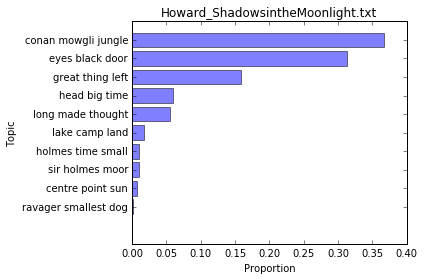

In [25]:
#document_nr = 7
visual.plot_doc_topics(doc_topic, 7)

In [26]:
word_weights_file = "tutorial_supplementals/mallet_output/topic_word_weights.txt"

word_scores_grouped = visual.read_mallet_word_weights(word_weights_file)

topic_nr  = 0
word_scores_grouped.get_group(topic_nr)

/home/sina/DARIAH/Topics/dariah_topics/visualization.py:352: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  word_scores = word_scores.sort(columns=[0,2], axis=0, ascending=[True, False])


,0,1,2
6874,0,holmes,241.01
983,0,time,143.01
96,0,small,130.01
2734,0,cried,122.01
4768,0,answered,121.01
3100,0,room,114.01
69,0,hand,112.01
1170,0,asked,108.01
792,0,found,105.01
6873,0,sherlock,105.01


In [27]:
number_of_top_words = 10
topic_nr = 2

wordlewords = visual.get_wordlewords(word_scores_grouped, number_of_top_words, topic_nr)

['lake', 'camp', 'feet', 'land', 'city', 'mountains', 'world', 'danforth', 'found', 'things']
[81.01, 74.01, 70.01, 70.01, 66.01, 63.01, 57.01, 55.01, 54.01, 54.01]


In [28]:
wordlewords

'lake 81.01camp 74.01feet 70.01land 70.01city 66.01mountains 63.01world 57.01danforth 55.01found 54.01things 54.01'

/home/sina/DARIAH/Topics/dariah_topics/visualization.py:352: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  word_scores = word_scores.sort(columns=[0,2], axis=0, ascending=[True, False])


['ravager', 'smallest', 'dog', 'moore', 'slippers', 'proper', 'master', 'wented', 'tags', 'back']
[198.01, 146.01, 128.01, 106.01, 105.01, 77.01, 69.01, 59.01, 59.01, 55.01]
ravager 198.01smallest 146.01dog 128.01moore 106.01slippers 105.01proper 77.01master 69.01wented 59.01tags 59.01back 55.01


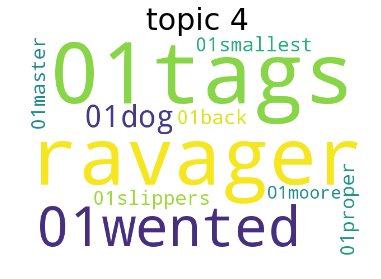

In [29]:
word_weights_file = "/home/sina/DARIAH/Topics/tutorial_supplementals/mallet_output/topic_word_weights.txt"
numOfTopics = 4
outfolder = "/home/sina/DARIAH/Topics/tutorial_supplementals/mallet_output/wordles"
dpi = 200
font_path = "/home/sina/DARIAH/Topics/tutorial_supplementals/font"
number_of_top_words = 10

wordle = visual.plot_wordle_from_mallet(word_weights_file, 
                                 numOfTopics,
                                 number_of_top_words,
                                 outfolder,
                                 dpi)